# Spark Funds Data Analysis
Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.
## Constraints for investments
- 5 to 15 million USD
- English-speaking countries
- Invest where most other investors are investing. This pattern is often observed among early stage startup investors
## The objective is to identify the best(where most investors are investing):
- sectors : eight 'main sectors'
- countries : most heavily invested
- a suitable investment type for making investments : investment amounts in the venture, seed, angel, private equity etc
## Investment Order
Seed/angel (Startup) ==> venture ==> Private equity

*Spark Funds wants to choose one of these four investment types for each potential investment they will make.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from IPython.display import display
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
companies = pd.read_csv("companies.csv", encoding='unicode_escape')

In [3]:
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


 Lets make country list a proper list

In [4]:
companies['category_list'] = companies['category_list'].apply(
    lambda cl: [c.strip() for c in str(cl).strip().split("|")])


In [5]:
rounds2 = pd.read_csv("rounds2.csv", encoding='unicode_escape')


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


 ## Checkpoint 1: Data Cleaning 1
 How many unique companies are present in companies?

In [7]:
len(companies['permalink'].unique())


66368

In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  66368 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


 In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
 permalink

 How many unique companies are present in rounds2?

In [9]:
len(rounds2['company_permalink'].unique())


90247

 companies\['permalink'\] and rounds2\['company_permalink'\] has to make lower case for comparision in merge

 Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [10]:
companies['permalink_l'] = companies['permalink'].str.lower()
rounds2['company_permalink_l'] = rounds2['company_permalink'].str.lower()

"Y" if len((set(rounds2['company_permalink_l'])).difference(
    set(companies['permalink_l']))) > 0 else "N"


'Y'

 Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [11]:
master_frame = companies.merge(
    rounds2,
    left_on='permalink_l',
    right_on='company_permalink_l',
    how="inner"
)
master_frame.shape[0]


114942

In [12]:
master_frame.sample(20)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_l,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l
67271,/Organization/New-Media-Education-Ltd,New Media Education Ltd,https://meducation.net,"[Education, Networking]",operating,GBR,A7,Birmingham,Birmingham,01-01-2008,/organization/new-media-education-ltd,/ORGANIZATION/NEW-MEDIA-EDUCATION-LTD,/funding-round/f6566181f7bc4414bae1916cd439bbbb,seed,NaN,19-03-2014,1000000.0,/organization/new-media-education-ltd
73421,/Organization/Passlogix,Passlogix,http://passlogix.com,"[Enterprise Software, Identity Management]",acquired,USA,NY,New York City,New York,01-01-1996,/organization/passlogix,/ORGANIZATION/PASSLOGIX,/funding-round/fe9d42589d65253177460bbf96748d6c,venture,C,19-02-2002,11500000.0,/organization/passlogix
94502,/Organization/Stanmore-Implants,Stanmore Implants Worldwide,http://www.stanmoreimplants.com,[Biotechnology],operating,GBR,F8,London,Elstree,NaN,/organization/stanmore-implants,/organization/stanmore-implants,/funding-round/bf891add88403f883904307f8381624a,undisclosed,NaN,20-07-2011,6452960.0,/organization/stanmore-implants
25012,/Organization/Cube-26,Cube26,http://www.cube26.com,[Software],operating,USA,CA,SF Bay Area,Santa Clara,01-01-2012,/organization/cube-26,/organization/cube-26,/funding-round/56b2d9a176feddbd262833eb2d537719,seed,NaN,19-10-2015,7700000.0,/organization/cube-26
30714,/Organization/Egifter,eGifter,http://www.egifter.com,"[E-Commerce, Mobile Commerce, Social Commerce,...",operating,USA,NY,Long Island,Huntington,01-01-2011,/organization/egifter,/ORGANIZATION/EGIFTER,/funding-round/440fa8702d9afbc935f022a6f5243678,venture,NaN,05-06-2015,1549936.0,/organization/egifter
66796,/Organization/Netero,Netero,http://www.netero.com,[P2P Money Transfer],operating,USA,TX,Dallas,Dallas,01-01-2014,/organization/netero,/organization/netero,/funding-round/a921f242ff8eb863750da71e0918845b,seed,NaN,15-09-2014,150000.0,/organization/netero
24276,/Organization/Creative-Gig,Creative Gig,http://creativegig.com,"[Creative Industries, Design, Freelancers, SaaS]",operating,NaN,NaN,NaN,NaN,07-03-2014,/organization/creative-gig,/organization/creative-gig,/funding-round/e2167e0dd6045142bded21970bcb5c1a,seed,NaN,01-09-2014,NaN,/organization/creative-gig
78767,/Organization/Pronai-Therapeutics,ProNAi Therapeutics,http://pronai.com,[Biotechnology],ipo,CAN,BC,Vancouver,Vancouver,01-01-2004,/organization/pronai-therapeutics,/ORGANIZATION/PRONAI-THERAPEUTICS,/funding-round/89e98a31465e7b3a86a0d6e7ff9863e4,venture,A,27-12-2010,1691410.0,/organization/pronai-therapeutics
56907,/Organization/Localcircles,LocalCircles,http://www.localcircles.com,[Social Media],operating,USA,CA,SF Bay Area,Santa Clara,01-01-2012,/organization/localcircles,/organization/localcircles,/funding-round/40126ac1e45190143d481929e515d031,seed,NaN,01-09-2012,NaN,/organization/localcircles
38809,/Organization/Gdgt,gdgt,http://gdgt.com,"[Blogging Platforms, Consumer Electronics, Ele...",acquired,USA,CA,SF Bay Area,San Francisco,01-07-2009,/organization/gdgt,/ORGANIZATION/GDGT,/funding-round/cff5c40b0130502f279a4d7138a2eab1,seed,NaN,01-07-2009,550000.0,/organization/gdgt


In [13]:
# master_frame.to_csv('master_frame.csv', index=False, quoting=csv.QUOTE_ALL)


 1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1
 2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [14]:
res1 = master_frame[['funding_round_type', 'raised_amount_usd']].groupby(by='funding_round_type').mean(
).reset_index().sort_values(by='raised_amount_usd', ascending=False)


 ## Checkpoint 2: Funding Type Analysis
 Ref : https://pbpython.com/styling-pandas.html

In [15]:
format_dict = {'raised_amount_usd': '${0:,.2f}'}

In [16]:
res1.style.format(format_dict).hide_index()


funding_round_type,raised_amount_usd
post_ipo_debt,"$168,704,571.82"
post_ipo_equity,"$82,182,493.87"
secondary_market,"$79,649,630.10"
private_equity,"$73,308,593.03"
undisclosed,"$19,242,370.23"
debt_financing,"$17,043,526.02"
venture,"$11,748,949.13"
grant,"$4,300,576.34"
convertible_note,"$1,453,438.54"
product_crowdfunding,"$1,363,131.07"


Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [17]:
res1[((5000000 <= res1['raised_amount_usd']) & (res1['raised_amount_usd']
                                                <= 15000000))].style.format(format_dict).hide_index()

funding_round_type,raised_amount_usd
venture,"$11,748,949.13"


In [18]:

unfiltered_master_frame = master_frame.copy()


Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

In [19]:
master_frame.shape

(114942, 18)

In [20]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']


In [21]:
master_frame.shape

(55493, 18)

Ref
 - https://worldpopulationreview.com/country-rankings/english-speaking-countries
 - https://raw.githubusercontent.com/stefangabos/world_countries/master/data/en/countries.csv
 - https://github.com/stefangabos/world_countries

In [22]:
countries = pd.read_csv("countries.csv")
countries['name_l'] = countries['name'].str.lower()
eng_countries = pd.read_csv("EnglishSpeakingCountries.csv")
eng_countries = eng_countries['country'].str.lower()


In [23]:


def map_eng_rank_to_ccode(country_to_match, match_series):
    res = list(filter(lambda t: fuzz.token_set_ratio(
        country_to_match, t) > 90, match_series))
    return True if res else False



In [24]:
countries['IsEnglish'] = countries['name_l'].apply(
    lambda n: map_eng_rank_to_ccode(n, eng_countries))
countries['alpha3_u'] = countries['alpha3'].str.upper()
countries.sample(10)

,id,name,alpha2,alpha3,name_l,IsEnglish,alpha3_u
139,620,Portugal,pt,prt,portugal,False,PRT
71,328,Guyana,gy,guy,guyana,True,GUY
168,760,Syrian Arab Republic,sy,syr,syrian arab republic,False,SYR
161,728,South Sudan,ss,ssd,south sudan,True,SSD
151,686,Senegal,sn,sen,senegal,False,SEN
121,520,Nauru,nr,nru,nauru,True,NRU
97,430,Liberia,lr,lbr,liberia,True,LBR
77,360,Indonesia,id,idn,indonesia,False,IDN
105,462,Maldives,mv,mdv,maldives,True,MDV
38,178,Congo,cg,cog,congo,False,COG


In [25]:
eng_countries_filtered = list(countries[countries['IsEnglish']]['alpha3_u'])


In [26]:
master_frame['IsEnglish'] = master_frame['country_code'].apply(
    lambda cc: cc in eng_countries_filtered)

master_frame.sample(20)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,permalink_l,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish
82096,/Organization/Red-M-Group,Red-M Group,http://www.red-m.com,[Mobile],acquired,GBR,P6,London,Horsham,01-01-1999,/organization/red-m-group,/organization/red-m-group,/funding-round/6fb2572fd12c7d2dc7966dfdb6c42283,venture,NaN,13-12-2005,9620000.0,/organization/red-m-group,True
103151,/Organization/Truedemand-Software,TrueDemand Software,http://www.tdemand.com,[Software],acquired,USA,CA,SF Bay Area,Los Gatos,01-01-2004,/organization/truedemand-software,/organization/truedemand-software,/funding-round/5fa92a82a97d8a6f3c21d4b315c90293,venture,B,29-08-2006,8000000.0,/organization/truedemand-software,True
55404,/Organization/Letstalkpayments-Com,Letstalkpayments.com,http://www.letstalkpayments.com,"[Financial Services, Services]",operating,USA,NC,Charlotte,Charlotte,01-01-2013,/organization/letstalkpayments-com,/ORGANIZATION/LETSTALKPAYMENTS-COM,/funding-round/2c32082473795bd55747f9a7df829d15,venture,NaN,26-05-2015,100000.0,/organization/letstalkpayments-com,True
70144,/Organization/Omnicademy,Omnicademy,http://www.omnicademy.com,"[Social Media, Systems]",operating,USA,LA,Baton Rouge,Port Allen,17-03-2010,/organization/omnicademy,/organization/omnicademy,/funding-round/b6985e86f2ef0cb4e202487432dbbdbe,venture,NaN,31-10-2011,250000.0,/organization/omnicademy,True
27225,/Organization/Deskwanted,Deskwanted,http://www.deskwanted.com,"[Freelancers, Search]",closed,NaN,NaN,NaN,NaN,01-12-2009,/organization/deskwanted,/ORGANIZATION/DESKWANTED,/funding-round/c1540622517da62224706c067e86966c,venture,NaN,01-11-2011,681350.0,/organization/deskwanted,False
70030,/Organization/Olx,OLX,http://www.olx.com,"[Curated Web, E-Commerce, Internet, Shopping]",operating,USA,NY,New York City,New York,01-03-2006,/organization/olx,/organization/olx,/funding-round/375d94036bd9a1c093adba2323927544,venture,A,01-09-2007,10000000.0,/organization/olx,True
85039,/Organization/Runa,Runa,http://www.runa.com,[Advertising],acquired,USA,CA,SF Bay Area,Mountain View,01-01-2009,/organization/runa,/ORGANIZATION/RUNA,/funding-round/b61b7555aeab931c86463c3996fae1b9,venture,NaN,16-08-2010,9200000.0,/organization/runa,True
23375,/Organization/Cool-Containers,Cool Containers,http://www.coolcontainers.com,[Enterprise Software],operating,USA,OH,OH - Other,Marietta,01-01-2009,/organization/cool-containers,/ORGANIZATION/COOL-CONTAINERS,/funding-round/03760dfb4f839c921ef475cb15d019ca,venture,NaN,23-04-2010,600000.0,/organization/cool-containers,True
16591,/Organization/Campuslive,Dailybreak Media,http://www.dailybreakmedia.com,[Advertising],operating,USA,MA,Boston,Boston,01-05-2008,/organization/campuslive,/ORGANIZATION/CAMPUSLIVE,/funding-round/97a94dfe8f4a8c32803428b322f29d34,venture,A,01-07-2012,5000000.0,/organization/campuslive,True
21607,/Organization/Codeoscopic,Codeoscopic,http://www.codeoscopic.com,"[Apps, Consulting, Internet]",operating,ESP,29,Madrid,Madrid,01-04-2009,/organization/codeoscopic,/ORGANIZATION/CODEOSCOPIC,/funding-round/5033f5c543b1a16b119c21ac87c8ccd6,venture,NaN,28-06-2011,2139150.0,/organization/codeoscopic,False


## Checkpoint 3: Country Analysis
Spark Funds wants to see the **top nine** countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [27]:
top9 = master_frame[master_frame['IsEnglish'] == True].groupby("country_code")['raised_amount_usd'].sum(
).reset_index().sort_values(by='raised_amount_usd', ascending=False)[:9]


 Identify the top three English-speaking countries in the data frame top9.

In [28]:
top9[:3].style.format({'raised_amount_usd': '${0:,.2f}'}).hide_index()



country_code,raised_amount_usd
USA,"$422,510,842,796.00"
GBR,"$20,245,627,416.00"
IND,"$14,391,858,718.00"


 ## Checkpoint 4: Sector Analysis 1

#### Extracting the primary sector of each category list from the category_list column

In [29]:
master_frame['primary_sector'] = master_frame['category_list'].apply(
    lambda c: c[0])

In [30]:
mapping = pd.read_csv("mapping.csv", encoding="unicode_escape")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [31]:
master_frame['category_list'].isnull().sum()


0

 Don't have any blank so proceed safely

In [32]:
sectors = mapping.columns
category_list = mapping['category_list'].str.lower()

In [33]:

# TODO: Performance critical


def get_main_sector(cat_list, category_list, mapping_frame):
    main_cat = cat_list.strip().lower()
    match_index = category_list[category_list == main_cat].index
    if match_index is not None:
        category_map_bool = mapping_frame.iloc[match_index] == True
        if category_map_bool.shape[0] > 0:
            selected_sectors = sectors[category_map_bool.values[0]].tolist()
            return selected_sectors[0] if selected_sectors else None
        return None
    return None



In [34]:
master_frame['main_sector'] = master_frame['primary_sector'].apply(
    lambda c: get_main_sector(c, category_list, mapping))

In [35]:
main_sectors = sectors[1:9]

In [36]:
master_frame = master_frame[master_frame['main_sector'].isin(main_sectors)]


In [37]:
# master_frame.to_excel("master_frame_filtered.xlsx", index=False)


 ## Checkpoint 5: Sector Analysis 2

In [38]:
# master_frame = pd.read_excel("master_frame_filtered.xlsx")

In [39]:
master_frame.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,[Media],operating,IND,16,Mumbai,Mumbai,NaN,...,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,True,Media,Entertainment
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,"[Application Platforms, Real Time, Social Netw...",operating,USA,DE,DE - Other,Delaware City,04-09-2014,...,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,True,Application Platforms,"News, Search and Messaging"
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,"[Apps, Games, Mobile]",operating,NaN,NaN,NaN,NaN,NaN,...,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,False,Apps,"News, Search and Messaging"
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,[Curated Web],operating,CHN,22,Beijing,Beijing,01-01-2007,...,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,False,Curated Web,"News, Search and Messaging"
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,[Software],operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,...,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,True,Software,Others


 #### TOP 3 COUNTRIES

In [40]:
USA = "USA"
GBR = "GBR"
IND = "IND"


In [41]:


def filter_data_for_c5(country):
    return master_frame[
        (
            # TODO: Could be done by dict based filtering for nice looking code
            (master_frame['country_code'].notnull()) &
            (master_frame['country_code'].notna()) &
            (master_frame['country_code'] == country) &
            (master_frame['funding_round_type'].notnull()) &
            (master_frame['funding_round_type'].notna()) &
            (master_frame['funding_round_type'] == "venture") &
            (master_frame['raised_amount_usd'].notnull()) &
            (master_frame['raised_amount_usd'].notna()) &
            (master_frame['raised_amount_usd'] >= 5000000) &
            (master_frame['raised_amount_usd'] <= 15000000)
        )]



  "venture"

In [42]:
D1 = filter_data_for_c5(USA)
D2 = filter_data_for_c5(GBR)
D3 = filter_data_for_c5(IND)


In [43]:
D1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
22,/Organization/1-Mainstream,1 Mainstream,http://www.1mainstream.com,"[Apps, Cable, Distribution, Software]",acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,...,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,True,Apps,"News, Search and Messaging"
103,/Organization/128-Technology,128 Technology,http://www.128technology.com/,"[Service Providers, Technology]",operating,USA,MA,Boston,Burlington,07-07-2014,...,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,True,Service Providers,Others
110,/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,[Manufacturing],operating,USA,MA,Boston,Bedford,01-01-2007,...,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/organization/1366-technologies,True,Manufacturing,Manufacturing
111,/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,[Manufacturing],operating,USA,MA,Boston,Bedford,01-01-2007,...,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/organization/1366-technologies,True,Manufacturing,Manufacturing
112,/Organization/1366-Technologies,1366 Technologies,http://www.1366tech.com,[Manufacturing],operating,USA,MA,Boston,Bedford,01-01-2007,...,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,/organization/1366-technologies,True,Manufacturing,Manufacturing


In [44]:
D2.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
864,/Organization/7Digital,7digital,http://about.7digital.com,"[Content Creators, Content Delivery, Licensing...",acquired,GBR,H9,London,London,01-01-2004,...,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,/organization/7digital,True,Content Creators,Entertainment
865,/Organization/7Digital,7digital,http://about.7digital.com,"[Content Creators, Content Delivery, Licensing...",acquired,GBR,H9,London,London,01-01-2004,...,/ORGANIZATION/7DIGITAL,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,/organization/7digital,True,Content Creators,Entertainment
942,/Organization/90Min,90min,http://www.90min.com,"[Media, News, Publishing, Soccer, Sports]",operating,GBR,H9,London,London,01-01-2011,...,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,True,Media,Entertainment
943,/Organization/90Min,90min,http://www.90min.com,"[Media, News, Publishing, Soccer, Sports]",operating,GBR,H9,London,London,01-01-2011,...,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,True,Media,Entertainment
1172,/Organization/Abcodia,Abcodia,http://abcodia.com,[Biotechnology],operating,GBR,H9,London,London,01-01-2010,...,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.0,/organization/abcodia,True,Biotechnology,Cleantech / Semiconductors


In [45]:
D3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
0,/Organization/-Fame,#fame,http://livfame.com,[Media],operating,IND,16,Mumbai,Mumbai,NaN,...,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,True,Media,Entertainment
227,/Organization/21Diamonds-India,21Diamonds,http://www.21diamonds.de,[E-Commerce],operating,IND,10,New Delhi,Gurgaon,01-06-2012,...,/ORGANIZATION/21DIAMONDS-INDIA,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,/organization/21diamonds-india,True,E-Commerce,Others
2507,/Organization/Adlabs-Imagica,Adlabs Imagica,http://www.adlabsimagica.com,"[Entertainment, Tourism]",operating,IND,16,IND - Other,Khopoli,NaN,...,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,/organization/adlabs-imagica,True,Entertainment,Entertainment
5305,/Organization/Ameyo,Ameyo,http://www.ameyo.com/,[Software],operating,IND,10,New Delhi,Gurgaon,01-01-2003,...,/ORGANIZATION/AMEYO,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.0,/organization/ameyo,True,Software,Others
5836,/Organization/Ani-Technologies,Ola,http://www.olacabs.com,"[Automotive, E-Commerce, Internet, Mobile, Mob...",operating,IND,28,Kolkata,Kolkata,03-12-2010,...,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.0,/organization/ani-technologies,True,Automotive,Automotive & Sports


 Total number of investments (count)

In [46]:
print(D1.shape[0], D2.shape[0], D3.shape[0])

9237 479 267


 Total amount of investment (USD)

In [47]:
print(D1['raised_amount_usd'].sum(),
      D2['raised_amount_usd'].sum(), D3['raised_amount_usd'].sum())


82980829501.0 4206816001.0 2392994052.0


In [48]:


def print_investment_status(curated_data):
    temp_frame = pd.pivot_table(curated_data, values='raised_amount_usd',
                                index='main_sector', aggfunc=['count', 'sum']).reset_index()
    temp_frame.columns = ['main_sector',
                          'raised_amount_usd_count', 'raised_amount_usd_sum']
    return temp_frame



In [49]:
D11 = print_investment_status(D1)
D22 = print_investment_status(D2)
D33 = print_investment_status(D3)


In [50]:
format_dict = {'raised_amount_usd_sum': '${0:,.2f}'}


In [51]:
# Ref: https://stackoverflow.com/questions/61363712/how-to-print-a-pandas-io-formats-style-styler-object
for rd in [(USA, D11), (GBR, D22), (IND, D33)]:
    print(f"Country: {rd[0]}")
    print("\t Sorted by Investment Count")
    display(rd[1].sort_values(by='raised_amount_usd_count',
                              ascending=False).style.format(format_dict).hide_index())
    print("\n\t Sorted by Investment Sum")
    display(rd[1].sort_values(by='raised_amount_usd_sum',
                              ascending=False).style.format(format_dict).hide_index())


Country: USA
	 Sorted by Investment Count


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,2923,"$26,089,280,296.00"
Cleantech / Semiconductors,2297,"$21,181,003,033.00"
"News, Search and Messaging",1563,"$13,796,816,094.00"
Health,908,"$8,200,859,357.00"
Manufacturing,799,"$7,258,553,378.00"
Entertainment,580,"$5,000,212,982.00"
Automotive & Sports,167,"$1,454,104,361.00"



	 Sorted by Investment Sum


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,2923,"$26,089,280,296.00"
Cleantech / Semiconductors,2297,"$21,181,003,033.00"
"News, Search and Messaging",1563,"$13,796,816,094.00"
Health,908,"$8,200,859,357.00"
Manufacturing,799,"$7,258,553,378.00"
Entertainment,580,"$5,000,212,982.00"
Automotive & Sports,167,"$1,454,104,361.00"


Country: GBR
	 Sorted by Investment Count


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,143,"$1,249,124,289.00"
Cleantech / Semiconductors,127,"$1,136,905,008.00"
"News, Search and Messaging",73,"$615,746,235.00"
Entertainment,54,"$461,511,059.00"
Manufacturing,42,"$361,940,335.00"
Health,24,"$214,537,510.00"
Automotive & Sports,16,"$167,051,565.00"



	 Sorted by Investment Sum


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,143,"$1,249,124,289.00"
Cleantech / Semiconductors,127,"$1,136,905,008.00"
"News, Search and Messaging",73,"$615,746,235.00"
Entertainment,54,"$461,511,059.00"
Manufacturing,42,"$361,940,335.00"
Health,24,"$214,537,510.00"
Automotive & Sports,16,"$167,051,565.00"


Country: IND
	 Sorted by Investment Count


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,109,"$1,007,409,507.00"
"News, Search and Messaging",52,"$433,834,545.00"
Entertainment,33,"$280,830,000.00"
Manufacturing,21,"$200,900,000.00"
Cleantech / Semiconductors,20,"$165,380,000.00"
Health,19,"$167,740,000.00"
Automotive & Sports,13,"$136,900,000.00"



	 Sorted by Investment Sum


main_sector,raised_amount_usd_count,raised_amount_usd_sum
Others,109,"$1,007,409,507.00"
"News, Search and Messaging",52,"$433,834,545.00"
Entertainment,33,"$280,830,000.00"
Manufacturing,21,"$200,900,000.00"
Health,19,"$167,740,000.00"
Cleantech / Semiconductors,20,"$165,380,000.00"
Automotive & Sports,13,"$136,900,000.00"


In [52]:
# Print complete frame
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)



In [53]:
highest_invested_companies = []
for df, sectors, c in [(D1, ['Others', 'Cleantech / Semiconductors'], USA),
                       (D2, ['Others', 'Cleantech / Semiconductors'], GBR),
                       (D3, ['Others', 'News, Search and Messaging'], IND)]:
    for i, sector in enumerate(sectors):
        sector_df = df[df['main_sector'] == sector]
        highest_invested_value = sector_df['raised_amount_usd'].max()
        sector_df = sector_df[sector_df['raised_amount_usd']
                              == highest_invested_value]
        sector_df.drop_duplicates(subset="name", keep=False, inplace=True)
        names = list(sector_df['name'])
        highest_invested_companies.append((i, c, names, sector_df))
        sector_df = None
        names = None


In [54]:
for _, c, companies, _ in highest_invested_companies:
    print(f"{c} : {len(companies)}")

USA : 168
USA : 149
GBR : 7
GBR : 2
IND : 15
IND : 1


In [55]:
for _, c, _, df in highest_invested_companies:
    print(c)
    display(df)

USA


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
191,/Organization/1Stdibs,1stdibs,http://www.1stdibs.com,[E-Commerce],operating,USA,NY,New York City,New York,01-01-2001,...,/ORGANIZATION/1STDIBS,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,C,24-01-2014,15000000.0,/organization/1stdibs,True,E-Commerce,Others
3359,/Organization/Agari-Data,Agari,http://www.agari.com,"[SaaS, Security]",operating,USA,CA,SF Bay Area,San Mateo,01-01-2009,...,/ORGANIZATION/AGARI-DATA,/funding-round/08f7137c4fd52f6e9a4852ee9a765e23,venture,C,23-09-2014,15000000.0,/organization/agari-data,True,SaaS,Others
4069,/Organization/Akorri,Akorri Networks,http://www.akorri.com,[Software],acquired,USA,MA,Boston,Littleton,01-01-2005,...,/ORGANIZATION/AKORRI,/funding-round/5a9ada593b969a2b814a7f040f22af89,venture,C,10-09-2007,15000000.0,/organization/akorri,True,Software,Others
4959,/Organization/Altoweb,AltoWeb,http://www.altoweb.com,[Software],closed,USA,CA,SF Bay Area,Palo Alto,01-01-1999,...,/ORGANIZATION/ALTOWEB,/funding-round/dad4cee2e436772ef678c367b5cddb4d,venture,B,01-01-2000,15000000.0,/organization/altoweb,True,Software,Others
6446,/Organization/Appcelerator,Appcelerator,http://appcelerator.com,"[Enterprise Software, Mobile, Mobility, Open S...",operating,USA,CA,SF Bay Area,Mountain View,01-09-2006,...,/organization/appcelerator,/funding-round/a3cf130fb3f34ee77aa3ad1c1a730c6a,venture,C,01-11-2011,15000000.0,/organization/appcelerator,True,Enterprise Software,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,/Organization/Wily-Technology,Wily Technology,http://www.wilytech.com,[Software],acquired,USA,CA,SF Bay Area,Brisbane,01-01-1998,...,/organization/wily-technology,/funding-round/01e7ef98a57f91f250970a0f4c389491,venture,C,04-02-2003,15000000.0,/organization/wily-technology,True,Software,Others
112078,/Organization/Xensource,XenSource,NaN,[Software],operating,USA,CA,SF Bay Area,Palo Alto,01-01-2004,...,/organization/xensource,/funding-round/b7ffdd5f546a623f54dd5ed2bc817ad6,venture,C,31-10-2006,15000000.0,/organization/xensource,True,Software,Others
112318,/Organization/Xoom,Xoom Corporation,http://xoom.com,"[E-Commerce, Finance, Financial Services, P2P ...",acquired,USA,CA,SF Bay Area,San Francisco,01-03-2001,...,/organization/xoom,/funding-round/c504f619d2a757c095ede3b81829fb48,venture,D,19-06-2006,15000000.0,/organization/xoom,True,E-Commerce,Others
113829,/Organization/Zenefits,Zenefits,http://www.zenefits.com,"[Enterprise Software, Health and Insurance, Hu...",operating,USA,CA,SF Bay Area,San Francisco,01-01-2013,...,/ORGANIZATION/ZENEFITS,/funding-round/777eb6c2ac39c5931bc7639956eaea43,venture,A,22-01-2014,15000000.0,/organization/zenefits,True,Enterprise Software,Others


USA


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
609,/Organization/480-Biomedical,480 Biomedical,http://www.480biomedical.com,[Biotechnology],operating,USA,MA,Boston,Watertown,01-01-2011,...,/ORGANIZATION/480-BIOMEDICAL,/funding-round/23d30096c6c31691dff8ff1b782eeba2,venture,A,14-02-2012,15000000.0,/organization/480-biomedical,True,Biotechnology,Cleantech / Semiconductors
1376,/Organization/Acadia-Pharmaceuticals,ACADIA Pharmaceuticals,http://www.acadia-pharm.com,"[Biotechnology, Health Care]",ipo,USA,CA,San Diego,San Diego,NaN,...,/organization/acadia-pharmaceuticals,/funding-round/c3b4f7b8fa5d4c1aa1ce27005623a969,venture,NaN,11-01-2011,15000000.0,/organization/acadia-pharmaceuticals,True,Biotechnology,Cleantech / Semiconductors
1965,/Organization/Active-Implants,Active Implants,http://www.activeimplants.com,[Biotechnology],operating,USA,TN,Memphis,Memphis,01-06-2004,...,/ORGANIZATION/ACTIVE-IMPLANTS,/funding-round/fad6ae551961c31cb509a85cc4b65761,venture,C,02-12-2009,15000000.0,/organization/active-implants,True,Biotechnology,Cleantech / Semiconductors
2044,/Organization/Acton-Pharmaceuticals,Acton Pharmaceuticals,http://actonpharmaceuticals.com,[Biotechnology],acquired,USA,MA,Boston,Marlborough,NaN,...,/organization/acton-pharmaceuticals,/funding-round/e7f8c0b814873d9fae73faaf24f4cf19,venture,A,06-01-2010,15000000.0,/organization/acton-pharmaceuticals,True,Biotechnology,Cleantech / Semiconductors
2753,/Organization/Advanced-Analogic-Technologies,Advanced Analogic Technologies,http://www.analogictech.com,[Semiconductors],acquired,USA,NM,NM - Other,Santa Clara,NaN,...,/ORGANIZATION/ADVANCED-ANALOGIC-TECHNOLOGIES,/funding-round/ba5ecf12e236fc0f5527a0bf920f31ea,venture,NaN,20-01-2004,15000000.0,/organization/advanced-analogic-technologies,True,Semiconductors,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110044,/Organization/Wellfount,Wellfount,http://wellfount.com,[Biotechnology],operating,USA,IN,Indianapolis,Indianapolis,01-01-2006,...,/organization/wellfount,/funding-round/36b07c28ca2dd17fe16ffeb195f737b9,venture,NaN,26-03-2014,15000000.0,/organization/wellfount,True,Biotechnology,Cleantech / Semiconductors
110768,/Organization/Wilinx,WiLinx,http://www.wilinx.com,[Semiconductors],closed,USA,CA,San Diego,Carlsbad,01-01-2003,...,/organization/wilinx,/funding-round/45a50ffd5b9806cd312ce618072d06a2,venture,C,10-01-2007,15000000.0,/organization/wilinx,True,Semiconductors,Cleantech / Semiconductors
112048,/Organization/Xencor,Xencor,http://xencor.com,"[Biotechnology, Health Care]",ipo,USA,CA,Los Angeles,Monrovia,01-01-1997,...,/organization/xencor,/funding-round/217c3f5f52a178cfac1b32a36cb4959e,venture,E,25-10-2007,15000000.0,/organization/xencor,True,Biotechnology,Cleantech / Semiconductors
113338,/Organization/Yulex,Yulex,http://www.yulex.com,[Clean Technology],operating,USA,AZ,Phoenix,Maricopa,NaN,...,/organization/yulex,/funding-round/b1e192c7439bc60c76d7da2b44682d24,venture,NaN,16-03-2011,15000000.0,/organization/yulex,True,Clean Technology,Cleantech / Semiconductors


GBR


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
9921,/Organization/Azure-Solutions,Azure Solutions,http://www.azuresolutions.com,[Software],acquired,GBR,H9,London,London,NaN,...,/ORGANIZATION/AZURE-SOLUTIONS,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,NaN,16-06-2005,15000000.0,/organization/azure-solutions,True,Software,Others
32364,/Organization/Environmentiq,EnvironmentIQ,NaN,[Software],operating,GBR,C3,London,Cambridge,01-01-1988,...,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15000000.0,/organization/environmentiq,True,Software,Others
49818,/Organization/Ip-Access,ip.access,http://www.ipaccess.com,[Software],operating,GBR,C6,Camborne,Camborne,01-01-2000,...,/ORGANIZATION/IP-ACCESS,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15000000.0,/organization/ip-access,True,Software,Others
68634,/Organization/Notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,[E-Commerce],operating,GBR,L1,London,Richmond,04-04-2006,...,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,D,21-05-2012,15000000.0,/organization/notonthehighstreet,True,E-Commerce,Others
87626,/Organization/Sensage,SenSage,http://www.sensage.com,[Security],acquired,GBR,B3,London,Bracknell,18-08-2004,...,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,NaN,09-04-2008,15000000.0,/organization/sensage,True,Security,Others
89720,/Organization/Silverrail-Technologies,SilverRail Technologies,http://silverrailtech.com,"[Technology, Transportation, Travel]",operating,GBR,H9,London,London,01-04-2009,...,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15000000.0,/organization/silverrail-technologies,True,Technology,Others
102680,/Organization/Tribold,Tribold,http://www.tribold.com,[Software],acquired,GBR,H9,London,London,01-01-2003,...,/ORGANIZATION/TRIBOLD,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15000000.0,/organization/tribold,True,Software,Others


GBR


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
5575,/Organization/Anadigm,Anadigm,http://www.anadigm.com/,"[Semiconductors, Technology]",closed,GBR,Z7,GBR - Other,Crewe,NaN,...,/ORGANIZATION/ANADIGM,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,C,02-10-2003,15000000.0,/organization/anadigm,True,Semiconductors,Cleantech / Semiconductors
31105,/Organization/Elixent,Elixent,https://www.elixent.com,[Semiconductors],operating,GBR,B7,Bristol,Bristol,01-01-2000,...,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,C,06-04-2005,15000000.0,/organization/elixent,True,Semiconductors,Cleantech / Semiconductors


IND


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
16958,/Organization/Caratlane,CaratLane,http://www.caratlane.com,"[E-Commerce, Jewelry]",operating,IND,25,Chennai,Chennai,01-10-2008,...,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,C,13-05-2013,15000000.0,/organization/caratlane,True,E-Commerce,Others
20273,/Organization/Classteacher-Learning-Systems,Classteacher Learning Systems,http://www.classteacher.com,"[EdTech, Education]",operating,IND,10,New Delhi,Gurgaon,01-01-1999,...,/ORGANIZATION/CLASSTEACHER-LEARNING-SYSTEMS,/funding-round/8be54e916f26b7702504530e6719305f,venture,NaN,27-06-2011,15000000.0,/organization/classteacher-learning-systems,True,EdTech,Others
22143,/Organization/Comat-Technologies,Comat Technologies,http://www.comat.com,"[Governments, Health and Insurance]",closed,IND,19,Bangalore,Bangalore,01-01-1996,...,/ORGANIZATION/COMAT-TECHNOLOGIES,/funding-round/4d24857fc321f2d54c16573a085b090c,venture,C,01-10-2008,15000000.0,/organization/comat-technologies,True,Governments,Others
22278,/Organization/Commonfloor,CommonFloor,http://www.commonfloor.com,[Real Estate],operating,IND,19,Bangalore,Bangalore,01-01-2007,...,/organization/commonfloor,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,F,08-01-2015,15000000.0,/organization/commonfloor,True,Real Estate,Others
35821,/Organization/Firstcry-Com,FirstCry.com,http://www.firstcry.com,[E-Commerce],operating,IND,16,Pune,Pune,01-01-2010,...,/ORGANIZATION/FIRSTCRY-COM,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,C,21-01-2014,15000000.0,/organization/firstcry-com,True,E-Commerce,Others
39946,/Organization/Girnarsoft,GirnarSoft,http://www.girnarsoft.com,"[Enterprise Software, Mobile Software Tools, M...",operating,IND,24,Jaipur,Jaipur,01-11-2007,...,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,A,20-11-2013,15000000.0,/organization/girnarsoft,True,Enterprise Software,Others
49908,/Organization/Ipolicy-Networks,iPolicy Networks,http://www.ipolicynet.com,[Security],operating,IND,36,New Delhi,Noida,NaN,...,/ORGANIZATION/IPOLICY-NETWORKS,/funding-round/5960ab7542caab51f2b89207bebd258b,venture,B,04-10-2005,15000000.0,/organization/ipolicy-networks,True,Security,Others
50513,/Organization/Itzcash-Card-Ltd,ItzCash Card Ltd.,http://itzcash.com,[Gift Card],operating,IND,16,Mumbai,Mumbai,01-01-2006,...,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,C,02-09-2014,15000000.0,/organization/itzcash-card-ltd,True,Gift Card,Others
51878,/Organization/K-12-Techno-Services,K-12 Techno Services,http://k12technoservices.com,"[EdTech, Education]",operating,IND,2,Secunderabad,Secunderabad,NaN,...,/ORGANIZATION/K-12-TECHNO-SERVICES,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,NaN,08-09-2010,15000000.0,/organization/k-12-techno-services,True,EdTech,Others
56018,/Organization/Limeroad,LimeRoad,http://www.limeroad.com,"[E-Commerce, Social Media]",operating,IND,10,New Delhi,Gurgaon,01-01-2012,...,/ORGANIZATION/LIMEROAD,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15000000.0,/organization/limeroad,True,E-Commerce,Others


IND


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,...,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_permalink_l,IsEnglish,primary_sector,main_sector
62904,/Organization/Mobile2Win-India,Mobile2Win India,http://www.mobile2win.com,[Mobile],operating,IND,16,Mumbai,Mumbai,NaN,...,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,NaN,13-11-2006,15000000.0,/organization/mobile2win-india,True,Mobile,"News, Search and Messaging"


In [56]:
for _, c, companies, _ in highest_invested_companies:
    print(f"{c} : {len(companies)}")

USA : 168
USA : 149
GBR : 7
GBR : 2
IND : 15
IND : 1


In [57]:
for i, c, companies, _ in highest_invested_companies:
    print(
        f"\nCompany(ies) for \"{c}\" {'top sector count-wise' if i==0 else 'second best sector count-wise'}\n")
    print(', '.join(companies))




Company(ies) for "USA" top sector count-wise

1stdibs, Agari, Akorri Networks, AltoWeb, Appcelerator, Approva, Apreso Classroom, Arena Solutions, Aryaka Networks, Astute Networks, Atesto Technologies, Authentium, Authentix, Avamar Technologies, Bag Borrow or Steal, Avere Systems, Bakbone Software, Betabrand, BetterWorks, BigBand Networks, Bigcommerce, BlueArc, Bluefly, BlueNote Networks, Branch Metrics, BreakingPoint Systems, Broadcast International, BTI Systems, Cape Clear Software, Capella Photonics, Carbonite, CashStar, Cassatt, Cedar Point Communications, Celergo, Cenzic, Certeon, Change Healthcare, Chloe + Isabel, Clinicient, Cloud Engines, CloudShield Technologies, Colorescience, Colubris Networks, Convergence, Convio, Coradiant, Couchsurfing, CrossChx, WorkFusion, Curious.com, Datadog, DATAllegro, DataSynapse, Dataupia, deCarta, Decisyon, Deploy Solution, Digital Signal, DoubleDutch, Dtex Systems, e-Rewards, Edmodo, Education.com, Efreightsolutions Holdings, Enablon, Empowered 

## Checkpoint 6: Plots

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [58]:
global_total_fund = unfiltered_master_frame['raised_amount_usd'].sum()
global_grouped_data = unfiltered_master_frame[['funding_round_type', 'raised_amount_usd']].groupby('funding_round_type').agg(
    {'raised_amount_usd': ['sum', 'mean']}
).reset_index()

global_grouped_data.columns = ['funding_round_type',
                               'raised_amount_usd_sum', 'raised_amount_usd_mean']
global_grouped_data['raised_amount_ratio'] = global_grouped_data['raised_amount_usd_sum']/global_total_fund
global_grouped_data.sort_values(
    'raised_amount_ratio', ascending=False, inplace=True)


In [59]:

k = global_grouped_data.style.format({'raised_amount_usd_mean': '${0:,.2f}',
                                      'raised_amount_usd_sum': '${0:,.2f}',
                                      'raised_amount_ratio': '{0:.2f}'
                                      }).hide_index()
display(k)

funding_round_type,raised_amount_usd_sum,raised_amount_usd_mean,raised_amount_ratio
venture,"$590,126,216,876.00","$11,748,949.13",0.60
private_equity,"$141,925,436,105.00","$73,308,593.03",0.14
debt_financing,"$113,884,840,886.00","$17,043,526.02",0.12
post_ipo_equity,"$51,610,606,151.00","$82,182,493.87",0.05
undisclosed,"$30,441,429,697.00","$19,242,370.23",0.03
post_ipo_debt,"$25,643,094,917.00","$168,704,571.82",0.03
seed,"$16,988,238,596.00","$719,779.62",0.02
grant,"$9,134,424,145.00","$4,300,576.34",0.01
angel,"$4,659,255,123.00","$958,694.47",0.00
secondary_market,"$2,389,488,903.00","$79,649,630.10",0.00


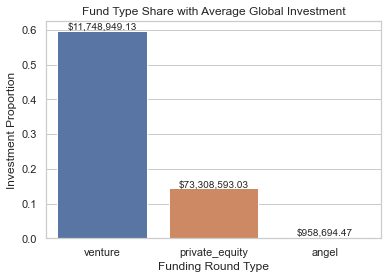

In [60]:
graph_data = global_grouped_data[global_grouped_data['funding_round_type'].isin(
    ['angel', 'venture', 'private_equity'])]

g = sns.barplot(x="funding_round_type",
                y='raised_amount_ratio', data=graph_data)
g.set(xlabel='Funding Round Type',
      ylabel='Investment Proportion', title='Fund Type Share with Average Global Investment')
# Ref: https://github.com/mwaskom/seaborn/issues/1582
for i, p in enumerate(g.patches):
    g.annotate('${0:,.2f}'.format(graph_data.iloc[i]['raised_amount_usd_mean']), (p.get_x(
    ) + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')
plt.show()

- A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

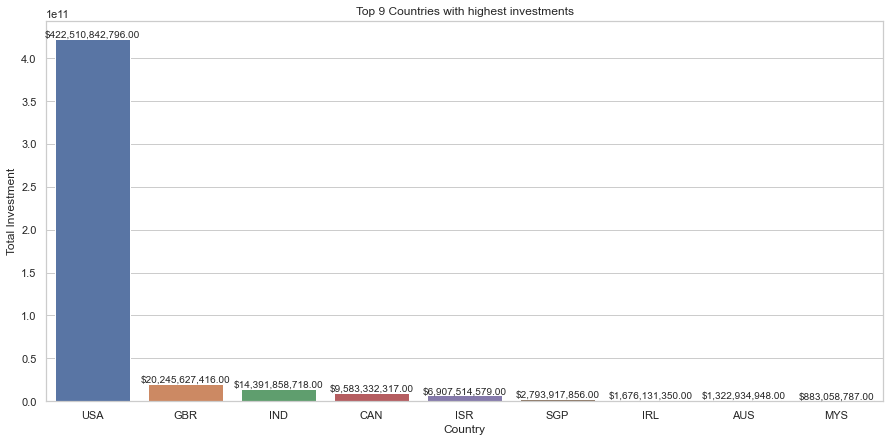

In [61]:
plt.figure(figsize=(15, 7))
graph_data = top9.sort_values(by='raised_amount_usd', ascending=False)
g = sns.barplot(x="country_code", y="raised_amount_usd", data=graph_data)
g.set(xlabel='Country',
      ylabel='Total Investment', title='Top 9 Countries with highest investments')
for i, p in enumerate(g.patches):
    g.annotate('${0:,.2f}'.format(graph_data.iloc[i]['raised_amount_usd']), (p.get_x(
    ) + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')
plt.show()


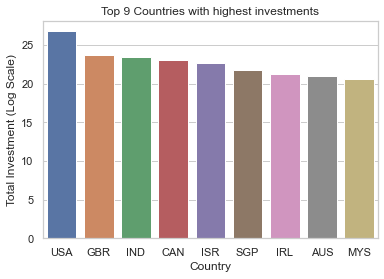

In [62]:
graph_data['raised_amount_usd_log'] = np.log(graph_data['raised_amount_usd'])
g = sns.barplot(x="country_code", y="raised_amount_usd_log", data=graph_data)
g.set(xlabel='Country',
      ylabel='Total Investment (Log Scale)', title='Top 9 Countries with highest investments')
plt.show()


A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [63]:
# chosen investment type : venture
# i, c, names, sector_df
# highest_invested_companies

usa_data = D1['main_sector'].value_counts()[:3]
gbr_data = D2['main_sector'].value_counts()[:3]
ind_data = D3['main_sector'].value_counts()[:3]

In [64]:
graph_data = pd.DataFrame(
    {"Sector": usa_data.index, "Count": usa_data.values,
        "Country": [USA for _ in range(len(usa_data))]}
).append(pd.DataFrame({"Sector": gbr_data.index, "Count": gbr_data.values, "Country": [GBR for _ in range(len(gbr_data))]})) \
    .append(pd.DataFrame({"Sector": ind_data.index, "Count": ind_data.values, "Country": [IND for _ in range(len(ind_data))]}))



<Figure size 1080x864 with 0 Axes>

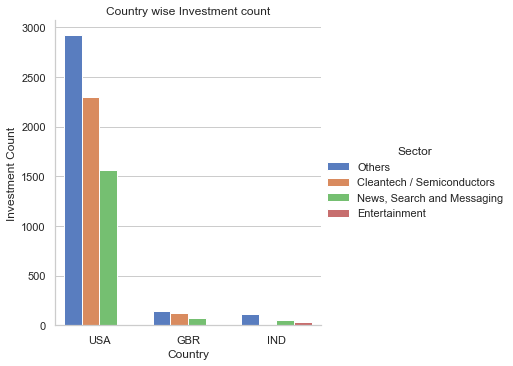

In [65]:
plt.figure(figsize=(15, 12))
g = sns.catplot(y="Count", x="Country", hue="Sector",
                data=graph_data, kind="bar", palette="muted", orient='v', legend_out=True)
# for i, p in enumerate(g.patches):
#     g.annotate('${0:,.2f}'.format(graph_data.iloc[i]['Count']), (p.get_x(
#     ) + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 4), textcoords='offset points')

g.set(xlabel='Country',
      ylabel='Investment Count', title='Country wise Investment count')
plt.show()